# HW3

### 오태환

## 1. Multinomial Naive Bayes

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [5]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

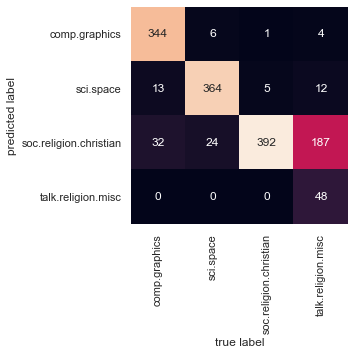

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [7]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [8]:
predict_category('sending a payload to the ISS')

'sci.space'

In [9]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [10]:
predict_category('determining the screen resolution')

'comp.graphics'

## 2. 와인 자료에서 LDA QDA feature expansion

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("C:/Users/dhxog/Desktop/ESC4-1/Week3/wineuci/Wine.csv", header = None)

In [14]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 변수 이름 바꿔주기

In [16]:
data.columns=["class","alc","malic","ash","alc_of_ash","mag","to_phe","fla","nonfla","pro","col","hue","dilu","proline"]
data.head()

,class,alc,malic,ash,alc_of_ash,mag,to_phe,fla,nonfla,pro,col,hue,dilu,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### NA 있나 찾기

In [18]:
data.isnull().sum()

class         0
alc           0
malic         0
ash           0
alc_of_ash    0
mag           0
to_phe        0
fla           0
nonfla        0
pro           0
col           0
hue           0
dilu          0
proline       0
dtype: int64

### Pair plot 그려서 변수들 그래프 살펴보기

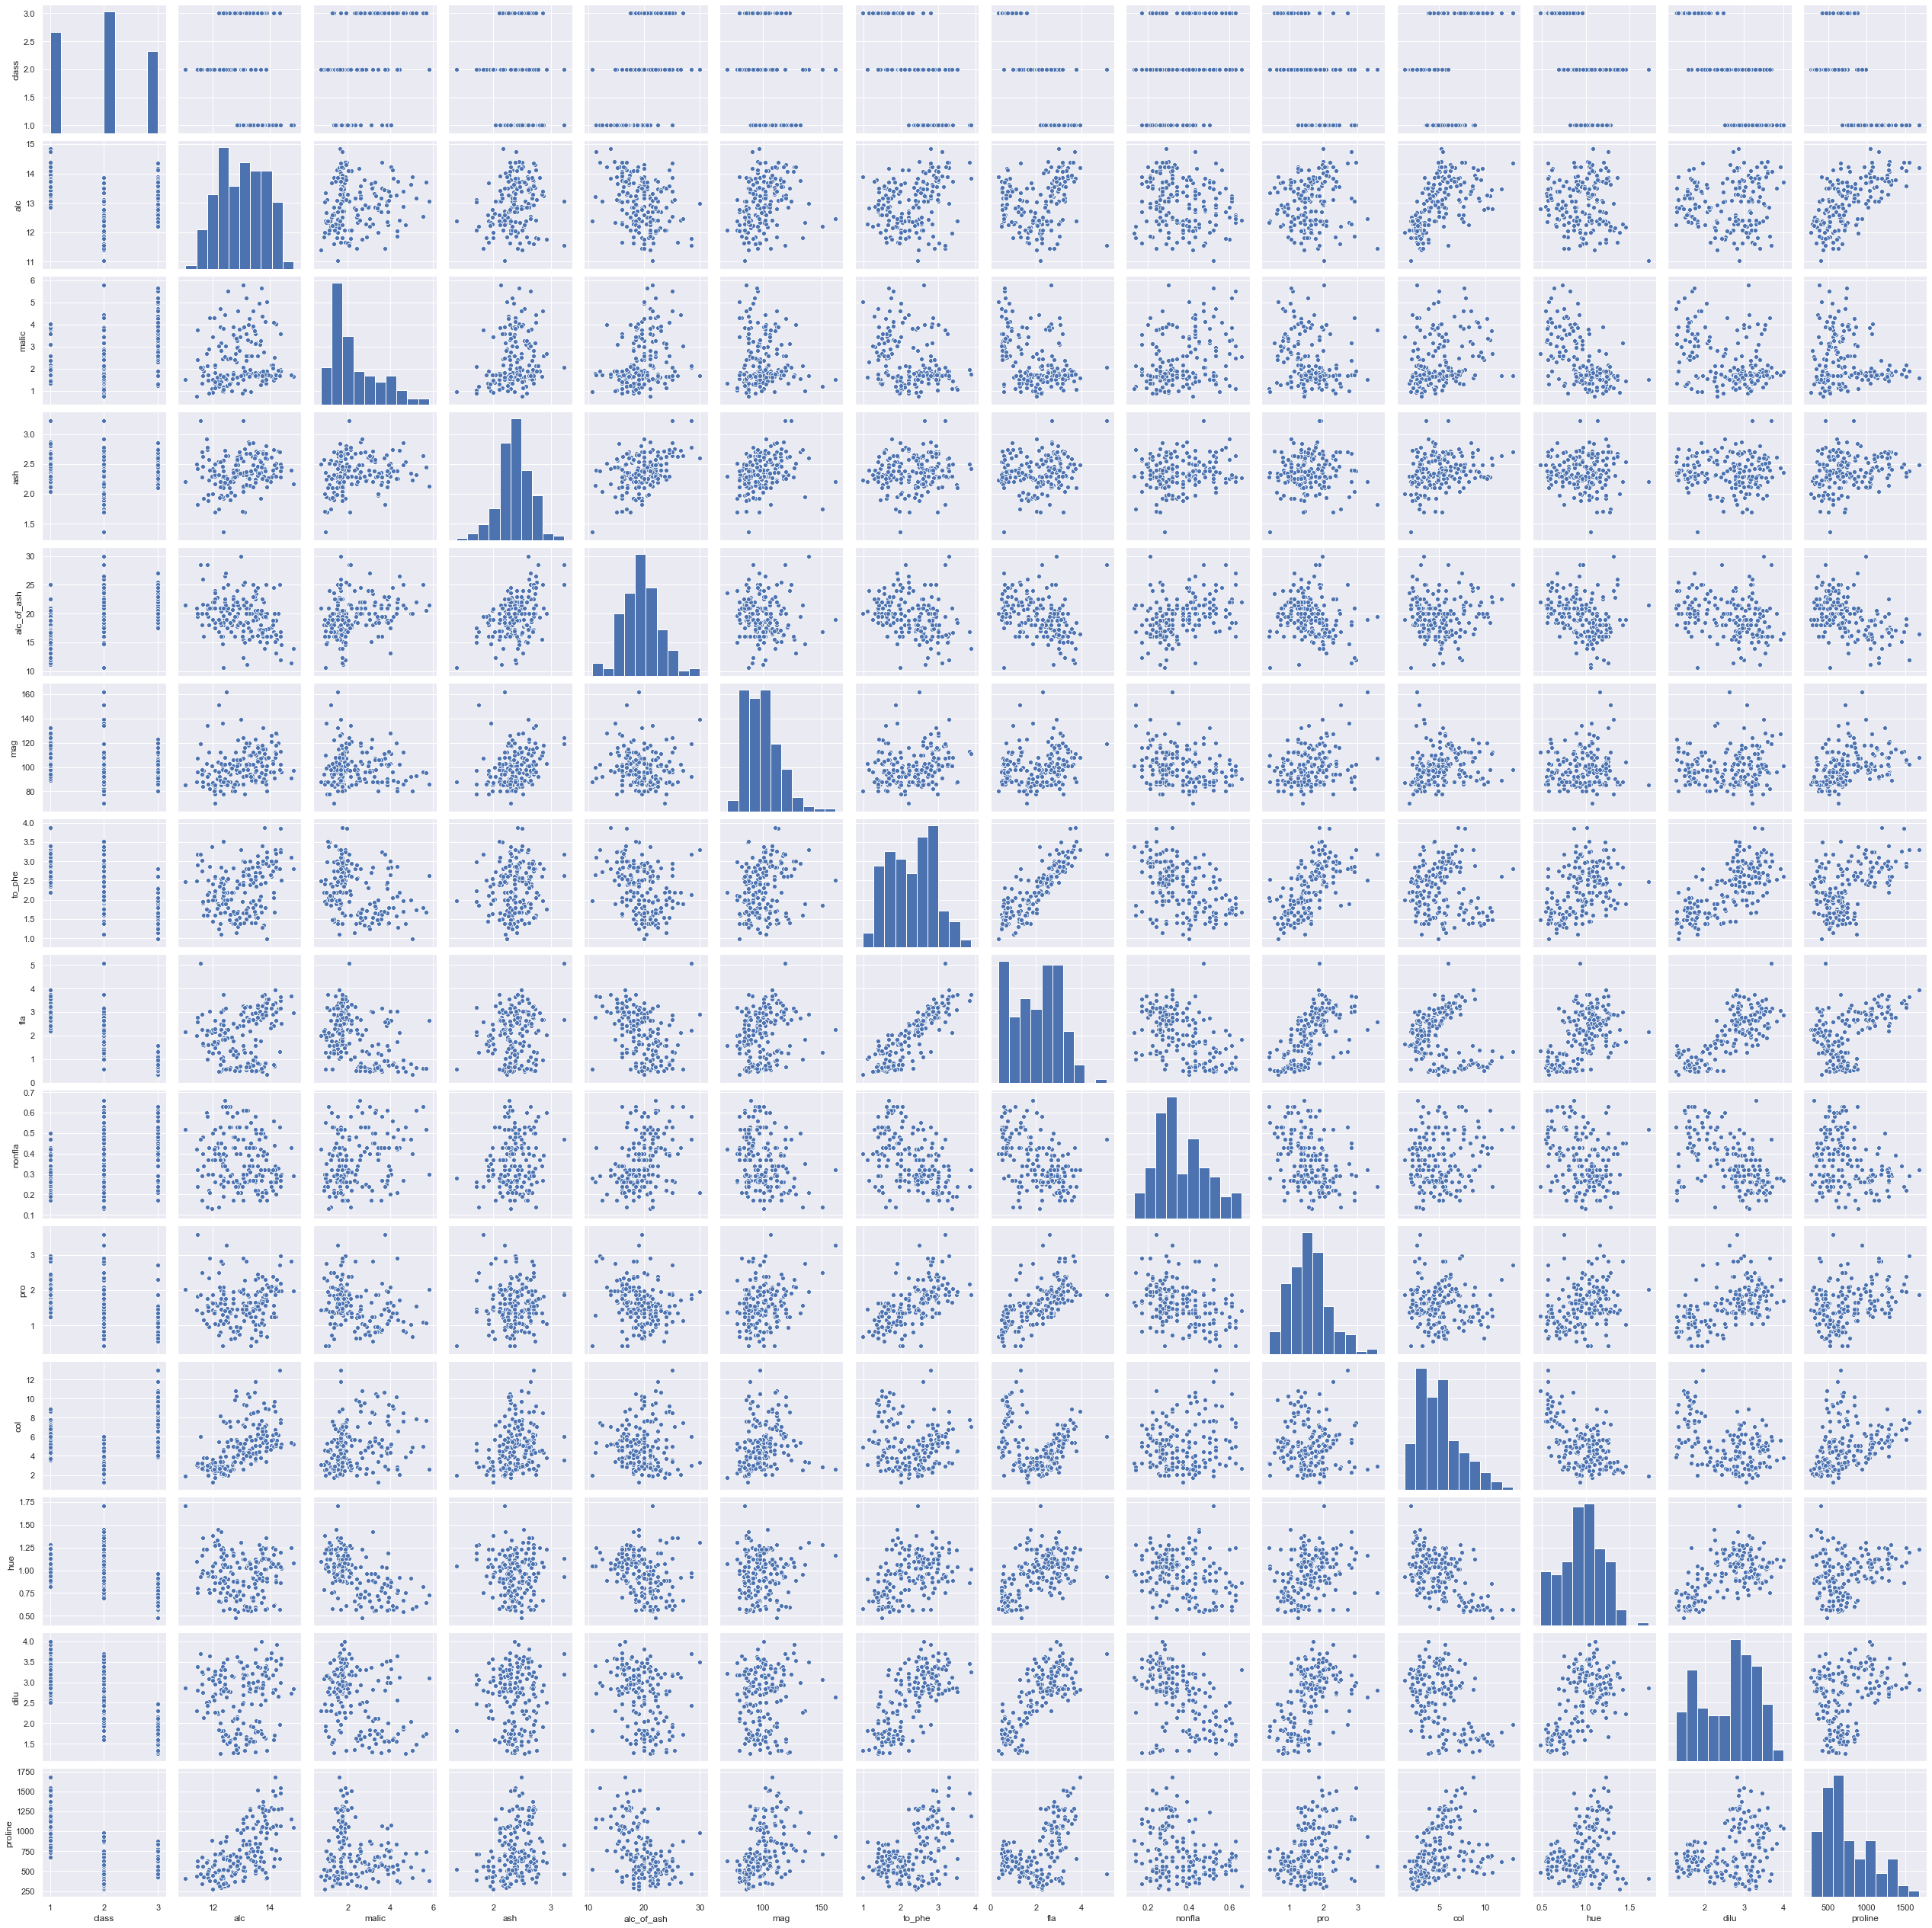

In [20]:
sns.pairplot(data)

### 대부분 정규분포를 따르는 것 같은데, skewed된게 몇 개, 상관관계가 있어 보이는 것이 있다. 다뤄보자

### Skewed variable transformation

#### malic, mag, col, proline 바꿔주자

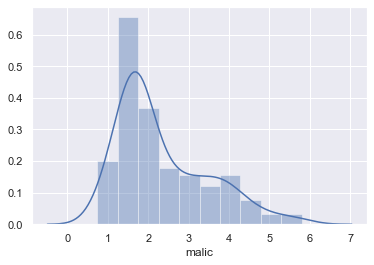

In [23]:
sns.distplot(data["malic"])

#### 로그변환 하자

In [24]:
data["malic"]=np.log(data.loc[:,"malic"])

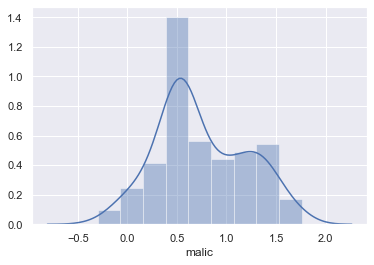

In [25]:
sns.distplot(data["malic"])

#### 좀 나아졌다.

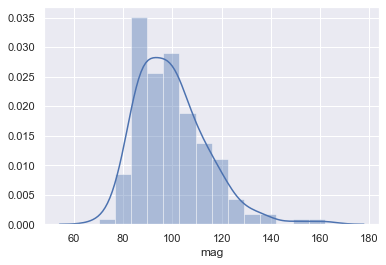

In [27]:
sns.distplot(data["mag"])

#### 얘도 로그변환 하자

In [28]:
data["mag"]=np.log(data.loc[:,"mag"])

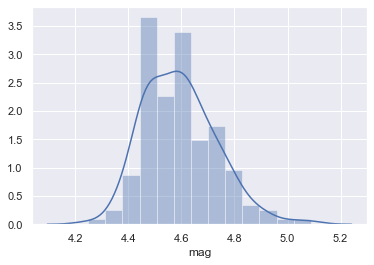

In [29]:
sns.distplot(data["mag"])

#### 나아졌다.

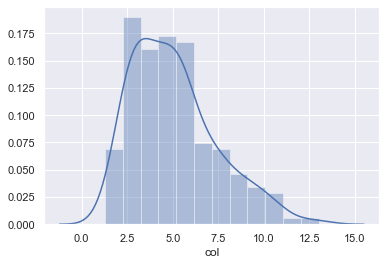

In [34]:
sns.distplot(data["col"])

#### 얜 정규화 함 해줘보자

In [40]:
data["col"] = (data["col"] - np.mean(data["col"])) / np.std(data["col"])

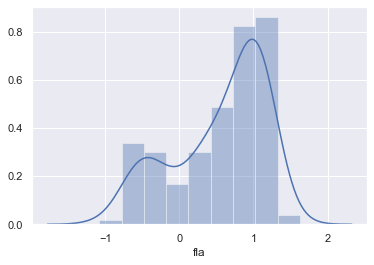

In [41]:
sns.distplot(data["fla"])

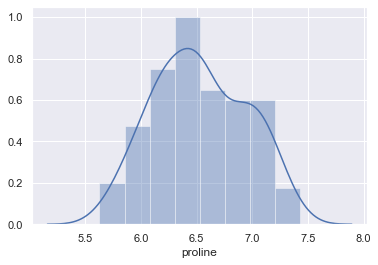

In [43]:
sns.distplot(np.log(data["proline"]))

#### 로그변환 하니까 좀 낫다.

In [44]:
data["proline"]=np.log(data.loc[:,"proline"])

### 상관관계 높은 애들 찾아서 하나만 고르자

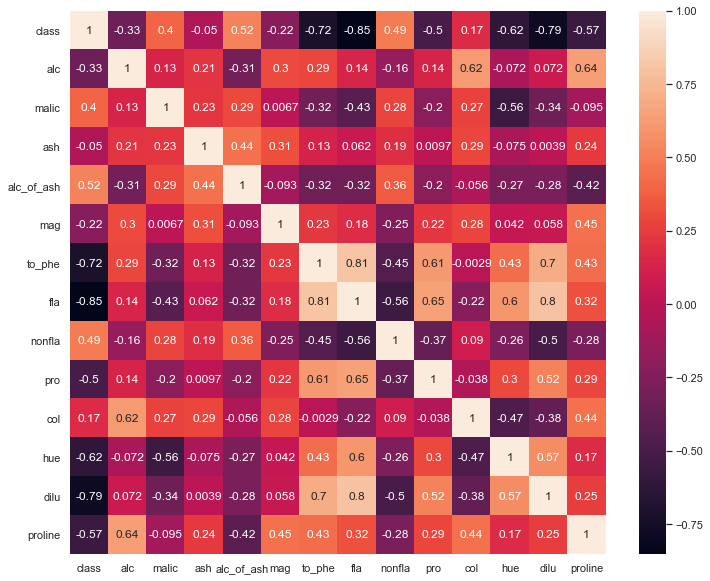

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

#### fla, to_phe, pro, dilu가 상관관계가 좀 보인다.

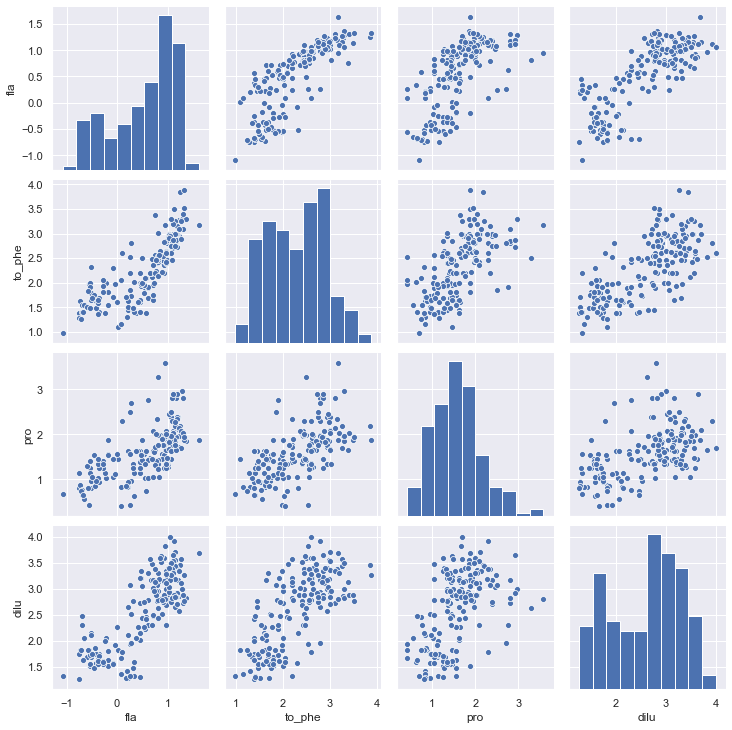

In [46]:
sns.pairplot(data[["fla","to_phe","pro","dilu"]])
plt.show()

#### 확실히 보인다. 저들 중 Class와의 상관관계가 가장 높은 fla 빼고 다 빼자 

In [48]:
data.drop(["to_phe","pro","dilu"], axis='columns', inplace=True)

## 이제 모델링 해보자

### test - train split

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:], data["class"], test_size=0.3, random_state=423)

In [51]:
print(x_train.shape);print(y_train.shape);print(x_test.shape);print(y_test.shape)

(124, 10)
(124,)
(54, 10)
(54,)


### 평가 위해 mse 함수 만들어주자

In [52]:
def mse(model, X, y):
    return np.mean((y - model.predict(X)) ** 2)

### LDA

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis().fit(x_train,y_train)
lda_tr_mse = mse(lda_model, x_train, y_train)
lda_te_mse = mse(lda_model, x_test, y_test)
print("LDA train mse : ", lda_tr_mse)
print("LDA test mse : ", lda_te_mse)

LDA train mse :  0.0
LDA test mse :  0.018518518518518517


### QDA

In [54]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis().fit(x_train,y_train)
qda_tr_mse = mse(qda_model, x_train, y_train)
qda_te_mse = mse(qda_model, x_test, y_test)
print("QDA train mse : ", qda_tr_mse)
print("QDA test mse : ", qda_te_mse)

QDA train mse :  0.0
QDA test mse :  0.037037037037037035


### Logistic Reg

In [55]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression(solver='sag', max_iter=100000, multi_class="auto")
logi_model.fit(x_train, y_train)
logi_tr_mse = mse(logi_model, x_train, y_train)
logi_te_mse = mse(logi_model, x_test, y_test)
print("Logistic Regression train mse : ", logi_tr_mse)
print("Logistic Regression test mse : ", logi_te_mse)

Logistic Regression train mse :  0.008064516129032258
Logistic Regression test mse :  0.07407407407407407


### Logistic Reg with feature expasion with kcv

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

for N in range(1, 4):
    poly = PolynomialFeatures(degree=N, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)
    logi_model.fit(x_train_poly, y_train)
    cv_error = np.mean(cross_val_score(logi_model, x_train_poly, y_train, scoring=mse, cv=5))
    
    print("MSE of degree" , N , " : ", cv_error)

MSE of degree 1  :  0.048
MSE of degree 2  :  0.04
MSE of degree 3  :  0.04


### 결국 LDA가 test mse 젤 낮다. 얘로 하자